# ECE 285 Assignment 1: KNN

For this part of assignment, you are tasked to implement KNN algorithm and test it on the a subset of CIFAR10 dataset.

You sould run the whole notebook and answer the question in the notebook.

TO SUBMIT: PDF of this notebook with all the required outputs and answers.

In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt


## Prepare Dataset

Since CIFAR10 is a relative large dataset, and KNN is quite time-consuming method, we only a small sub-set of CIFAR10 for KNN part

In [2]:
from ece285.utils.data_processing import get_cifar10_data

# Use a subset of CIFAR10 for KNN assignments
dataset = get_cifar10_data(subset_train=5000, subset_val=250, subset_test=500)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)


dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)


## Implementation (60%)

You need to implement the KNN method in `algorithms/knn.py`. You need to fill in the prediction function(since the training of KNN is just remembering the training set).

For KNN implementation, you are tasked to implement two version of it.

* Two Loop Version: use one loop to iterate through training samples and one loop to iterate through test samples
* One Loop Version: use one loop to iterate through test samples and use broadcast feature of numpy to calculate all the distance at once

Note: It is possible to build a Fully Vectorized Version without explicit for loop to calculate the distance, but you do not have to do it in this assignment. You could use the fully vectorized version to replace the loop versions as well.

For distance function, in this assignment, we use Eucliean distance between samples.

In [3]:
from ece285.algorithms import KNN

knn = KNN(num_class=10)
knn.train(
    x_train=dataset["x_train"],
    y_train=dataset["y_train"],
    k=5,
)


### Compare the time consumption of different method

In this section, you will test your different implementation of KNN method, and compare their speed.

In [4]:
from ece285.utils.evaluation import get_classification_accuracy


#### Two Loop Version:

In [5]:
import time

c_t = time.time()
prediction = knn.predict(dataset["x_test"], loop_count=2)
print("Two Loop Prediction Time:", time.time() - c_t)

test_acc = get_classification_accuracy(prediction, dataset["y_test"])
print("Test Accuracy:", test_acc)


Two Loop Prediction Time: 30.509931087493896
Test Accuracy: 0.278


#### One Loop Version 

In [6]:
import time

c_t = time.time()
prediction = knn.predict(dataset["x_test"], loop_count=1)
print("One Loop Prediction Time:", time.time() - c_t)

test_acc = get_classification_accuracy(prediction, dataset["y_test"])
print("Test Accuracy:", test_acc)


One Loop Prediction Time: 9.322421073913574
Test Accuracy: 0.278


**Your different implementation should output the exact same result**


## Test different Hyper-parameter(20%)

For KNN, there is only one hyper-parameter of the algorithm: How many nearest neighbour to use(**K**).

Here, you are provided the code to test different k for the same dataset.

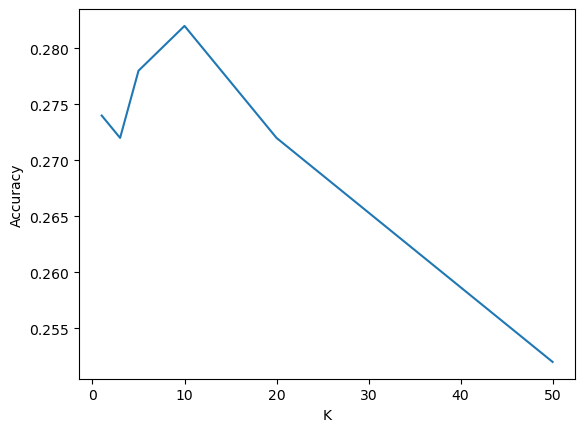

In [7]:
accuracies = []

k_candidates = [1, 3, 5, 10, 20, 50]
for k_cand in k_candidates:
    prediction = knn.predict(x_test=dataset["x_test"], k=k_cand)
    acc = get_classification_accuracy(prediction, dataset["y_test"])
    accuracies.append(acc)
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.plot(k_candidates, accuracies)
plt.show()


In [8]:
print(accuracies)

[0.274, 0.272, 0.278, 0.282, 0.272, 0.252]


### Inline Question 1:

Please describe the output result you get, and provide some explanation as well.


### Your Answer:

**Put Your Answer Here**

- At k = 10, we get the maximum accuracy of 0.282. This is the optimum value of k. Now we will discuss happens when k is too small or too big.
- When k is too small, it will result in a high variance model which will be very sensitive to the noise in the data and hence, will result in a low test accuracy.
- When k is too big, it will result in a high bias model which will lead to underfiting and simpler decision boundaries.

## Try different feature representation(20%)

Since machine learning method rely heavily on the feature extraction, you will see how different feature representation affect the performance of the algorithm in this section. 

You are provided the code about using **HOG** descriptor to represent samples in the notebook.

In [9]:
from ece285.utils.data_processing import get_cifar10_data
from ece285.utils.data_processing import HOG_preprocess
from functools import partial

# Delete previous dataset to save memory
del dataset
del knn

# Use a subset of CIFAR10 for KNN assignments
hog_p_func = partial(
    HOG_preprocess,
    orientations=9,
    pixels_per_cell=(4, 4),
    cells_per_block=(1, 1),
    visualize=False,
    multichannel=True,
)
dataset = get_cifar10_data(
    feature_process=hog_p_func, subset_train=5000, subset_val=250, subset_test=500
)


Start Processing


/Users/akanshaaa/Downloads/assignment1/ece285/utils/data_processing.py:22: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features.append(hog(data[i], **kwargs).reshape(1, -1))


Processing Time: 9.019700050354004


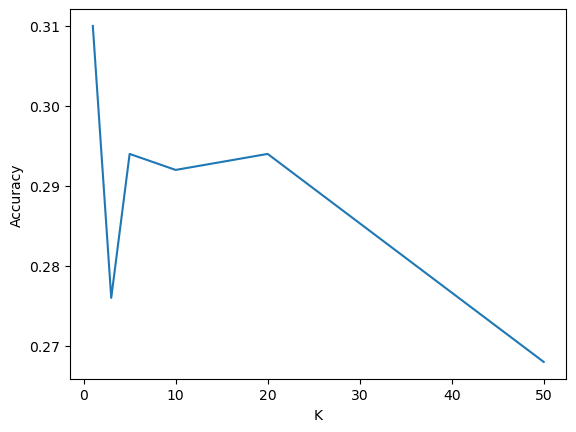

In [10]:
knn = KNN(num_class=10)
knn.train(
    x_train=dataset["x_train"],
    y_train=dataset["y_train"],
    k=5,
)
accuracies = []

k_candidates = [1, 3, 5, 10, 20, 50]
for k_cand in k_candidates:
    prediction = knn.predict(x_test=dataset["x_test"], k=k_cand)
    acc = get_classification_accuracy(prediction, dataset["y_test"])
    accuracies.append(acc)

plt.ylabel("Accuracy")
plt.xlabel("K")
plt.plot(k_candidates, accuracies)
plt.show()


In [11]:
print(accuracies)

[0.31, 0.276, 0.294, 0.292, 0.294, 0.268]


### Inline Question 2:

Please describe the output result you get, compare with the result you get in the previous section, and provide some explanation as well.

### Your Answer:

**Put Your Answer Here**

- Compared to the results obtained in the previous section, the accuracy of the classifier has improved from 0.282 to 0.31, and the optimal value of K is now 1. 

- By incorporating HOG features into the kNN algorithm, you provide a more informative and discriminative feature representation, which leads to improved accuracy.

- The accuracy starts dropping but remains stable from 3 to 20 and then starts decreasing again.

- When k is too small, the model overfits where the algorithm is relying on just a few neighbors. 

- The reason for high accuracy could be that the cifar data is very simple and does not have noise. 

- When k is too large, the model starts to underfit which causes the accuracy to decrease.